# Social Media Analytics : Twitter (keyword based search and analysis )

In [1]:
# Author : Praveen Vijayan , TCS-A&I 

Objective :
    
1. Enter search keyword
2. Mine the tweets based on the keyword
3. Wordcloud
4. Sentiment Analysis 
5. Topic modeling

# 1. Enter search keyword

In [16]:
search_twitter_term = "tcs" # Please enter the search term here 

In [2]:
search_twitter_term

'tcs'

# Import packages 

In [1]:
import re
import json
from pprint import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
from text_preprocess import processTweet2,getStopWordList,replaceTwoOrMore
from textblob import TextBlob
import sys
import tweepy
from tweepy import OAuthHandler

# Define functions 

In [4]:
# keys and tokens from the Twitter Dev Console
consumer_key = 'UWvrjlCmbqN0BZoNo5taXZUva'
consumer_secret = 'p4QwEe9ENbgrUGIezaRNpieI8DTCw0NbVgBZacLNXqD6GM9tyZ'
access_token = '77678973-fYSD8juWLu42i8IcOAq1RyumwHORZMWDM4YGgQ3RO'
access_token_secret = '7n08WCd0pu3D7IvJTNwALGEpEgrXjiaGKkVr7KrUit2w3'

In [5]:
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        #consumer_key = consumer_key
        #consumer_secret = consumer_secret
        #access_token = access_token
        #access_token_secret = access_token_secret
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
            
            
    def get_tweets(self, query, count = 100):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count , language = 'en')
            #fetched_tweets = self.Stream(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                #parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
            
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 


# 2. Mine the tweets

In [19]:
max_number_of_tweets = 100 # Edit here for changing number of tweets to be mined

In [20]:
# creating object of TwitterClient Class
api = TwitterClient()
# calling function to get tweets
tweets = api.get_tweets(query = search_twitter_term, count = max_number_of_tweets)

In [21]:
print('\033[1m'+"Number of tweets mined : "+ str(len(tweets))+ '\033[0m')

Number of tweets mined : 84


In [9]:
#for tweet in tweets:
    #print(tweet)

# Twitter streaming data 

In [32]:
number_of_seconds_to_stream_twitter = 60 
#term="google"

In [36]:
# %run ./twitter_stream_download.py -q $term -d data

1507548542.6574883
60
0.0
420


# Processing the tweets

# Generate random tweets from the data and clean the tweets ( Please iterate)

In [91]:
dataset = 'data/stream_sbi.json' # Give the data set in json format 
#dataset = 'stream_google.json'
search_twitter_term = 'sbi'

# merge with existing search twitter data 

In [92]:
tweets = []
for line in open(dataset, 'r'):   
    #print(line)
    if not line.isspace():
        tweets.append(json.loads(line))

In [93]:
print('\033[1m'+"Number of tweets mined : "+ str(len(tweets))+ '\033[0m')

Number of tweets mined : 114


In [94]:
from random import randint
i = randint(1, len(tweets)) # For getting a random tweet from the data 
print('\033[1m'+"Tweet number : " + str(i) + '\033[0m' + "\n")
print('\033[1m'+"Original tweet : "+'\033[0m')
print(tweets[i]["text"].encode(sys.stdout.encoding, errors='replace'))    
print('\033[1m'+"Processed tweet :" + '\033[0m')
print(replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"]))).encode(sys.stdout.encoding, errors='replace'))


Tweet number : 45

Original tweet : 
b'RT @ETMutualFunds: The fund has a good performance record and it\xe2\x80\x99s expense ratio is the lowest in its category.@SBIMF \nhttps://t.co/4X0Jjmj\xe2\x80\xa6'
Processed tweet :
b'rt the fund has a good performance record and it s expense ratio is the lowest in its category. '


# Stopword removal

In [95]:
STOPWORD_customized = {search_twitter_term}

In [96]:
from nltk.corpus import stopwords 
import string
stop = set(stopwords.words('english'))

words=' '
for i in range (0,len(tweets)):
    temp = replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
    temp = " ".join([i for i in temp.lower().split() if i not in stop])
    temp = " ".join([i for i in temp.split() if i not in STOPWORD_customized])
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    temp = shortword.sub('', temp) 
    print(temp)
    words = words + temp     



eclerx services stock may rise adds stake
pero mam wala daw kami nun huhu
eclerx services stock may rise adds stake
 minimum balance 235 fine
 atm amp
gmo
tienes que puta para que tus pagafantas den like jajajajaj pobrecita idiota por cierto
prtimes news

 fake aqu aparece una las fotos que subido jajajaj

 bakasyon kala galing germany ganon maywardisourship
 nga hbang tumatagal mas ngging matibay aldubmahalagaka
 nga nmn minsan lng cguro ate maine swet mag ily.
annoying service. charging blocked card since years. use credit card.
nisa amp etf etf
esta tipa fake una sus fotos aparece otros sitios
eclerx services stock may rise adds stake

 india reasonably successful reducing corruption research
 nga hbang tumatagal mas ngging matibay aldubmahalagaka

eclerx services stock may rise adds stake
sbiatmfraud
new chairman rajnish kumar writes letter staff
 nga hbang tumatagal mas ngging matibay aldubmahalagaka
 times
 fraud withdrawal 55600 account atm. card
fake

 india reasonably success

# 3 .Generate Wordcloud

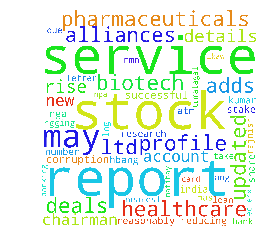

In [97]:
wordcloud = WordCloud(
    #font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
    #stopwords=STOPWORDS.union(stopword),
    background_color='white',
    #mask = logomask,
    max_words=50,
    width=4000,
    height=4000
).generate(words)

plt.imshow(wordcloud.recolor(random_state=3))
plt.axis('off')
plt.savefig( './' + search_twitter_term + '_'+'tweetcloud.png', dpi=300)
plt.show()

# 4. Sentiment Analysis

In [98]:
from textblob import TextBlob
import sys

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(tweet)
    # set sentiment
    if analysis.sentiment.polarity >= 0.2:
        return 'positive'
    elif (analysis.sentiment.polarity < 0):
        return 'negative'
    else:
        return 'neutral'


# 4.1 Sentiment Analysis of tweets ( Iterate this part for more examples)

In [99]:
from random import randint
i = randint(1, len(tweets)) # For getting a random tweet from the data 

print('\033[1m'+"Tweet number : " + str(i) + '\033[0m' + "\n")
print('\033[1m'+"Original tweet : "+'\033[0m')
print(tweets[i]["text"].encode(sys.stdout.encoding, errors='replace'))    

print('\033[1m'+"Processed tweet :" + '\033[0m')
print(replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"]))).encode(sys.stdout.encoding, errors='replace'))
temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
print("\n")
print('\033[1m'+"Sentiment of the tweet :" + '\033[0m' )

print(get_tweet_sentiment(temp) + "(" + " score = " + str(TextBlob(temp).sentiment.polarity) + ")")

Tweet number : 30

Original tweet : 
b'https://t.co/wNqfCy0cyN'
Processed tweet :
b' '


Sentiment of the tweet :
neutral( score = 0.0)


# 4.2 Enter any text and check its sentiment

In [100]:
text_for_checking_sentiment = "TCS is doing good"
#text_for_checking_sentiment = "TCS is doing bad"


In [101]:
print('\033[1m'+"Sentiment of the text :" + '\033[0m')
print(get_tweet_sentiment(text_for_checking_sentiment) + "(" + " score = " + str(TextBlob(text_for_checking_sentiment).sentiment.polarity) + ")")

Sentiment of the text :
positive( score = 0.7)


In [102]:
print('\033[1m'+"Number of tweets handled : "+ str(len(tweets))+ '\033[0m')

Number of tweets handled : 114


In [103]:
pos=neg=neu=0
sentiment_all = []
for i in range (0,len(tweets)):
    temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
    sentiment= get_tweet_sentiment(temp)
    sentiment_all.append(TextBlob(temp).sentiment.polarity)
    
    if sentiment == 'positive':
        pos = pos + 1
    if sentiment == 'negative':
        neg = neg + 1
    if sentiment == 'neutral':
        neu = neu + 1
    

# 4.3.a Tweets sentiment distribution chart

In [104]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['neutral','positive','negative']
values = [neu,pos,neg]
colors = ['#808080', '#00FF00', '#FA0000']

trace = go.Pie(labels=labels, values=values ,
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1)))

py.iplot([trace], filename='Tweets sentiment distribution chart')

# 4.3.b Tweets sentiment variation chart ( -1 to +1)

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = len(tweets)
random_x = np.linspace(1, N, N)
random_y = sentiment_all

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y
)

data = [trace]

py.iplot(data, filename='basic-line')

# 5. Topic modeling

In [105]:
tweets_topic = []

words=' '
for i in range (0,len(tweets)):
    temp= replaceTwoOrMore(re.sub('[^a-zA-Z0-9 \n\.]', ' ', processTweet2(tweets[i]["text"])))
    tweets_topic.append(temp) 

In [106]:
doc_complete = tweets_topic

In [107]:
STOPWORD_customized = {search_twitter_term}

In [108]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    normalized = " ".join([i for i in normalized.split() if i not in STOPWORD_customized])
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    normalized = shortword.sub('', normalized)
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

# Hyper parameters for tuning topic model 

In [109]:
num_topics=5 # number of topics required
num_words=10  # number of words in each topic
iter = 50 # Passes for LDA .. higher the better 

In [110]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [111]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=iter)

# Topics : 

In [112]:
#ldamodel.print_topics(num_topics=num_topics, num_words=num_words)

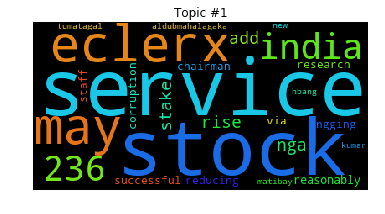

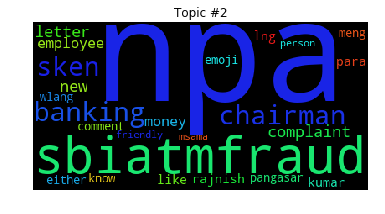

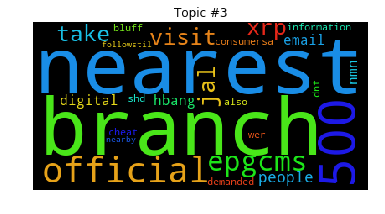

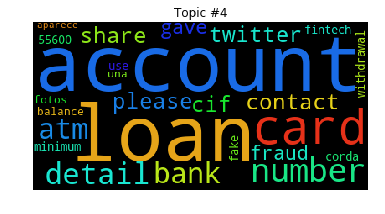

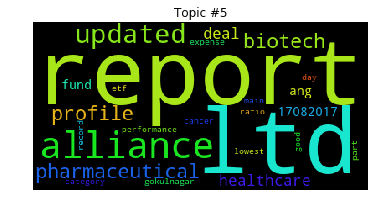

In [113]:
# lda is assumed to be the variable holding the LdaModel object
import matplotlib.pyplot as plt
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(ldamodel.show_topic(t, 25)))
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    plt.savefig('./'+  search_twitter_term + '_'+"Topic #" + str(t+1)+'.png', dpi=300)
    plt.show()